# **Lecture 11B**
# **Summarizing Data into Charts**


Charts can be created in Python by using the **matplotlib** module. You can call functions directly in matplotlib or using it through panadas. In our lecture, we will be using the functions through panadas.

In [2]:
# Run the code below to access files in your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# We will need the panadas module for the plots
import pandas as pd

Run the following code to load the data to be used in this notebook.

In [4]:
# Telco.xlsx is a file containing records of customers of a telcommunication company
telco = pd.read_excel("/content/drive/MyDrive/Data/Telco.xlsx",sheet_name="Telco")
display(telco)

,CID,JoinDate,Sex,Age,PlanName,MonthlyFee,Discount,NRenewal,PlanEndDate,HasLongDist,...,NCallLast1,NCallLast2,NCallLast3,NCallLast4,NCallLast5,NCallLast6,MobileTV,MobilePayment,ClubPurchase,Roaming
0,24842,2008/3/2,m,37,basic,149,0,0,22107,1,...,54,33,38,39,20,43,-999.0,-999.0,53.2,185.4
1,39864,2008/6/28,m,42,basic,158,12,1,21573,1,...,36,32,49,34,48,26,-999.0,-999.0,-999.0,130
2,47097,2010/9/12,f,34,premium,191,0,0,21872,1,...,24,33,41,34,50,24,-999.0,-999.0,-999.0,
3,76326,2008/6/19,u,58,value,114,0,2,21316,0,...,31,25,21,17,22,27,-999.0,-999.0,138.2,
4,10793,2011/1/27,m,39,cheap,164,0,0,21849,0,...,31,21,49,27,19,35,37.8,199.5,-999.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50263,2009/8/12,f,50,basic,149,0,2,21918,0,...,56,61,47,43,42,41,-999.0,-999.0,-999.0,
4996,52152,2008/12/17,m,36,vip,251,13,0,21507,0,...,206,181,187,191,183,198,-999.0,-999.0,-999.0,342.7
4997,72807,2015/10/8,f,31,value,98,16,1,22159,0,...,33,36,43,29,42,26,-999.0,-999.0,174.2,
4998,14416,2010/10/10,m,36,premium,199,20,1,22033,0,...,44,36,52,41,49,60,-999.0,-999.0,-999.0,


---
**Example 1:** Creating bar chart for one categorical variable. To create a bar chart, you have to summarize the categorical variable by a pivot table first. Then, you create the bar chart using plot function.

Suppose you have a DataFrame ***df*** and the categorical column to be plotted is ***cat_column*** and the value column to be counted is ***value_column***.
* First you need to create a pivot table with the syntax **table = pd.pivot_table(*df*,index=[*cat_column*],values=[*value_column*], aggfunc="count")**
* Then you create the bar chart by the syntax **table.plot.bar()**.

,CID
PlanName,
basic,982
cheap,477
premium,464
value,2577
vip,500


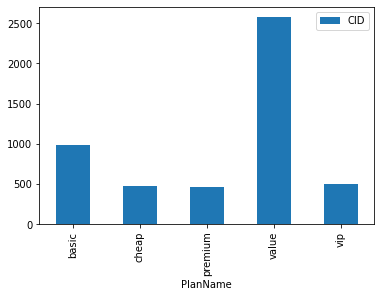

In [ ]:
# Creating a pivot table summarizing the PlanName column
# i.e. we are counting the no. of customer ID in each category of PlanName
table = pd.pivot_table(telco,index=["PlanName"],values=["CID"],aggfunc="count")
display(table)

# Generate a plot based on the counts in the table
table.plot.bar()


---
**Example 2:** Creating bar chart for summarizing 2 categorical variables. We will first summarize the data into a pivot table first and then create the chart by using pandas functions.

Suppose you have a DataFrame ***df***. The categorical columns to be summarized are ***cat_column1*** and ***cat_column2***. The value column to be counted is ***value_column***.

* First, you need to create a pivot table with the syntax **table = pd.pivot_table(*df*,index=[*cat_column1*],columns=[*cat_column2*],values=[*value_column*],aggfunc="count")**.
* Then you create the chart by **table.plot.bar()**.
* If you want a horizontal chart, you can use **table.plot.barh()**.
* If you want the bars for ***cat_column2*** to be stacked, you can add the option **stacked=*True***.

CID           
Sex         f     m    u
PlanName                
basic     403   541   38
cheap     187   273   17
premium   165   275   24
value     997  1478  102
vip       215   270   15

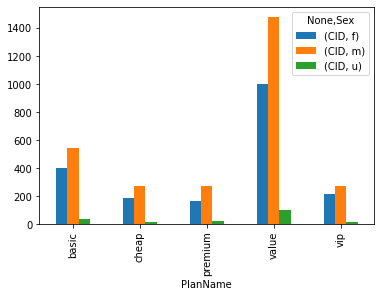

In [ ]:
# Create a pivot table to summarize PlanName and Sex.
# We are counting the number of customer ID (CID) in each combination of PlanName and Sex.
table = pd.pivot_table(telco,index=["PlanName"],columns=["Sex"],values=["CID"],aggfunc="count")
display(table)

# This is the default bar chart.
table.plot.bar()

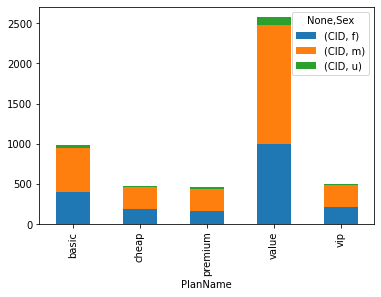

In [ ]:
# The bars for Sex will not be stacked.
table.plot.bar(stacked=True)


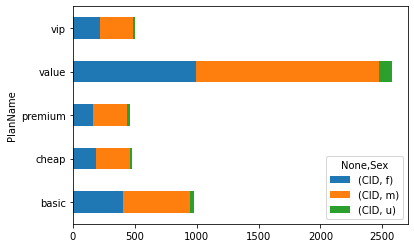

In [ ]:
# This is a horizontal version of the bar chart.
table.plot.barh(stacked=True)

---
**Example 3:** Creating pie chart for one categorical variable. To create a bar chart, you have to summarize the categorical variable by a pivot table first. Then, you create the bar chart using plot function.

Suppose you have a DataFrame ***df*** and the categorical column to be plotted is ***cat_column*** and the value column to be counted is ***value_column***.
* First you need to create a pivot table with the syntax **table = pd.pivot_table(*df*,index=[*cat_column*],values=[*value_column*], aggfunc="count")**
* Then you create the pie chart by the syntax **table.plot.pie(subplots=True)**. The option **subplots=True** means that a pie chart will be created for each column in the pivot table.

,CID
PlanName,
basic,982
cheap,477
premium,464
value,2577
vip,500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a5703c710>],
      dtype=object)

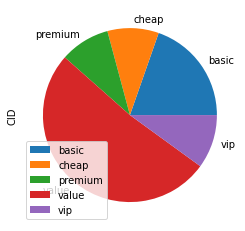

In [ ]:
# Creating a pivot table summarizing the PlanName column
# i.e. we are counting the no. of customer ID in each category of PlanName.
table = pd.pivot_table(telco,index=["PlanName"],values=["CID"],aggfunc="count")
display(table)

# Creating the pie chart
table.plot.pie(subplots=True)

---
**Example 4:** Creating a histogram for one numeric (continuous) variable. 

Suppose you have a DataFrame ***df*** and you want to summarize the numeric column ***num_column*** using a histogram.
* The syntax will be **df[*num_column*].plot.hist(bins=*n*)**.
* The option **bins=*n*** allows you to specify the number of bins (i.e. no. of bars) to be used in the plot.

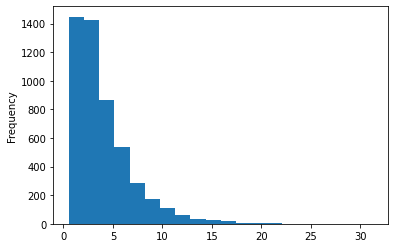

In [ ]:
# Creating a histogram for DataUseLast1 with 20 bins.
telco["DataUseLast1"].plot.hist(bins=20)


---
**Example 5:** Pandas histogram function also allows us to compare the distributions of multiple numeric variables in one plot.

* The sytax will be **df[*list_of_num_columns*].plot.hist(bins=*n*)**.
* By default, the histograms will be overlaid on top of each other. You can use the **alpha=*p*** option to control the transparency of the histograms. The value ***p*** is from 0 to 1. A value of 0 means completely transparent. A value of 1 means completely solid.
* You can also use the **stacked=*True*** option to stack the bars instead of overlapping.

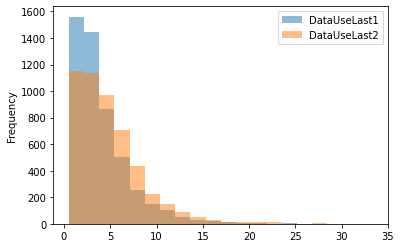

In [ ]:
# We are comparing the distribution of DataUseLast1 and DataUseLast2.
# The two histograms are overlapping each other.
# The transparency is set a 0.5.
telco[["DataUseLast1","DataUseLast2"]].plot.hist(bins=20,alpha=0.5)


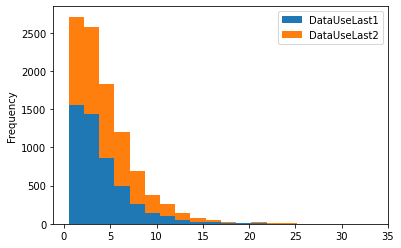

In [ ]:
# We are comparing the distributions of DataUseLast1 and DataUseLast2.
# The two histograms are stacked.
telco[["DataUseLast1","DataUseLast2"]].plot.hist(stacked=True,bins=20)

---
**Example 6:** An alternative for summarizing numeric (continuous) variable is to use boxplot. 
* The syntax will be **df[*num_column*].plot.box()**.
* If you want to compare the distributions of multiple variables, you will modify the syntax to **df[*list_of_columns*].plot.box()**.


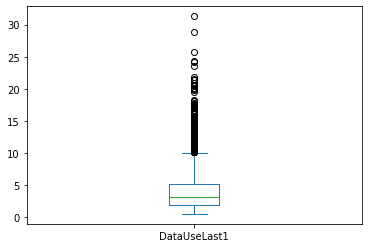

In [ ]:
# Create a boxplot for the column DataUseLast1.
telco["DataUseLast1"].plot.box()

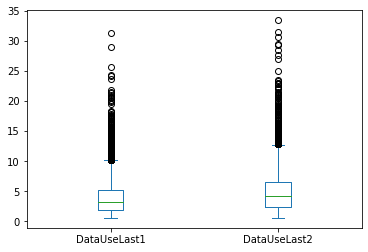

In [ ]:
# Create boxplots for 2 columns in the DataFrame
telco[["DataUseLast1","DataUseLast2"]].plot.box()

---
**Example 7:** You will use scatter plot if you want to summarize the relationship between 2 numberic (continuous) variables.

Suppose ***df*** is a DataFrame. Then the syntax for scatter plot will be as follows.

* **df.plot.scatter(x=*x_column*, y=*y_column*)** will create a scatter plot using the 2 columns specified.
* If you want to highlight the points by different colors based on a categorical variable, such as Sex, you need to define a mapping from category values to color. It can be done by **color_map=df[*cat_column*].map(*mapping_dict*)**, where ***cat_column*** is the categorical variable, ***mapping_dict*** is a dictionary in which key is the category value and value is the color. ***color_map*** will be used in the option **c=*color_map***.
* Names of colors can be found at this page https://matplotlib.org/stable/tutorials/colors/colors.html .


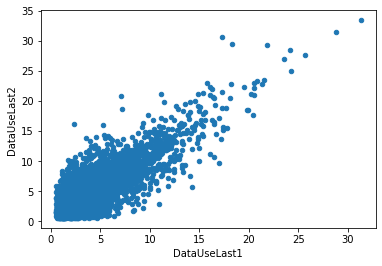

In [ ]:
# Creating a scatter plot
# DataUseLast1 is on x-axis
# DataUseLast2 is on y-axis
telco.plot.scatter(x="DataUseLast1",y="DataUseLast2")

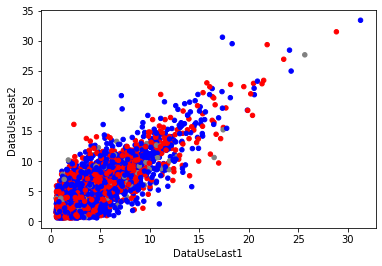

In [ ]:
# Creating a scatter plot
# DataUseLast1 is on x-axis
# DataUseLast2 is on y-axis
# Color is based on Sex
gender_color = telco["Sex"].map({"m":"blue","f":"red","u":"gray"})
telco.plot.scatter(x="DataUseLast1",y="DataUseLast2",c=gender_color)

---
**Example 8:** Here are some basic plot options for **df.plot.XXX()** functions.
* **figsize(*xsize*,*ysize*)** is for controlling the size of your plot.
* **color=*list_of_colors*** controls the color of the elements in your plot. Many different color codes can be found here https://matplotlib.org/stable/tutorials/colors/colors.html. No. of colors to be specified to be specified depends on the plot.
* **title=*title_string*** allows you to specify a main title for the plot.
* **xlabel=*xlabel_string*** allows you to specify x-axis label for the plot.
* **ylabel=*ylabel_string*** allows you to specify y-axis label for the plot.
* See the complete list of pd.plot options at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html# .
* If you cannot find the options needed, you will need to access the options via matplotlib.


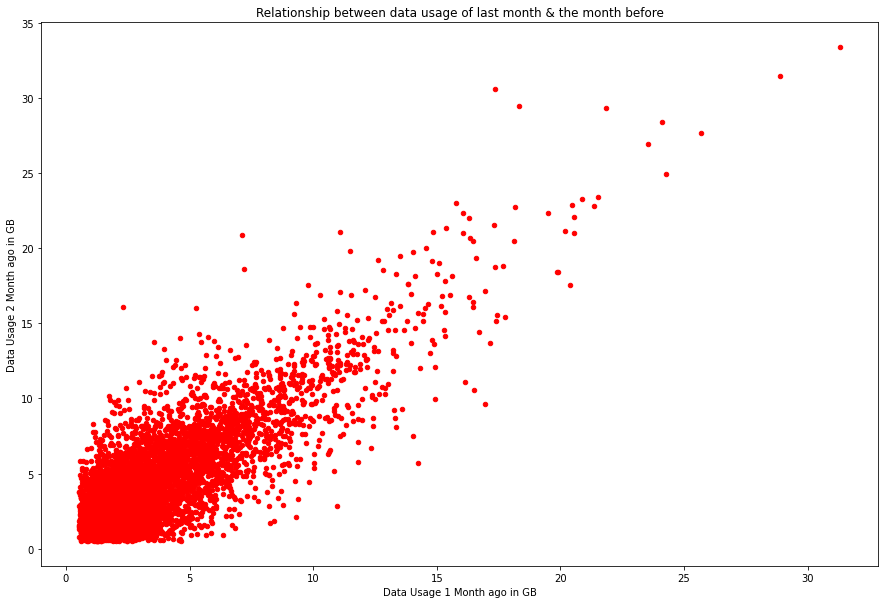

In [ ]:
# Size of the plot is adjusted by figsize=(15,10) 
# Change the color of the points by color="red"
# Main title and axes labels are changed by title=, xlabel= & ylabel=
telco.plot.scatter(x="DataUseLast1",y="DataUseLast2",
                   figsize=(15,10),
                   color="red",
                   title="Relationship between data usage of last month & the month before",
                   xlabel="Data Usage 1 Month ago in GB",
                   ylabel="Data Usage 2 Month ago in GB")


---
**Example 9:** If you want to compare the distributions of a numeric variable in different categories of a grouping variable. You will need another version of histogram and boxplot functions.

Suppose ***df*** is a DataFrame. ***num_column*** is the numeric variable to be plotted and ***group_column*** is the grouping variable. Then ths syntax for grouped histogram and boxplot are as follows.

* **df.hist(column=*num_column*,by=*group_column*)**
* **df.boxplot(column=*num_column*,by=*group_column*)**

Note that these functions DO NOT have the "plot." prefix.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a56b3a610>,
      dtype=object)

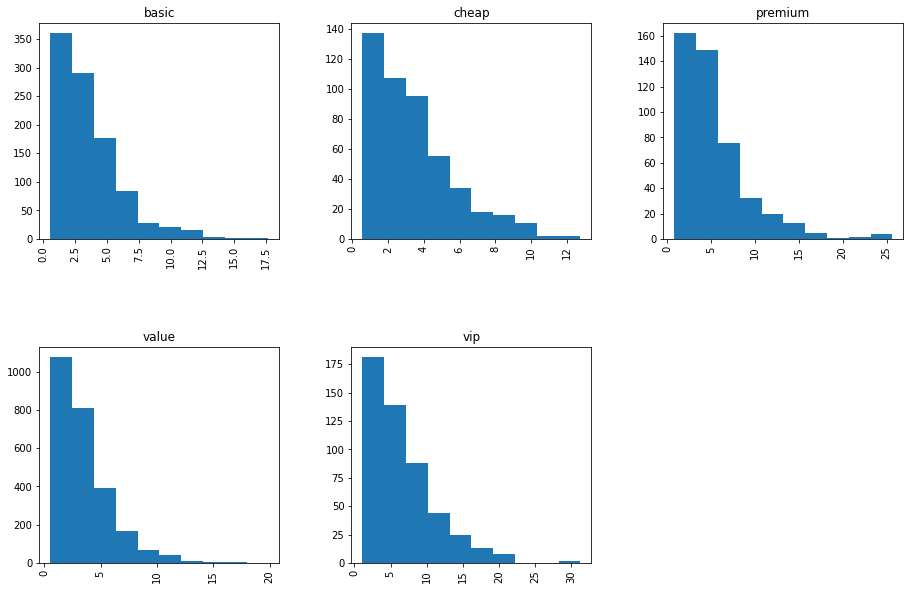

In [ ]:
# We are looking a the distribution of DataUseLast1, grouped by PlanName
telco.hist(column="DataUseLast1",by="PlanName",layout=(2,3),figsize=(15,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


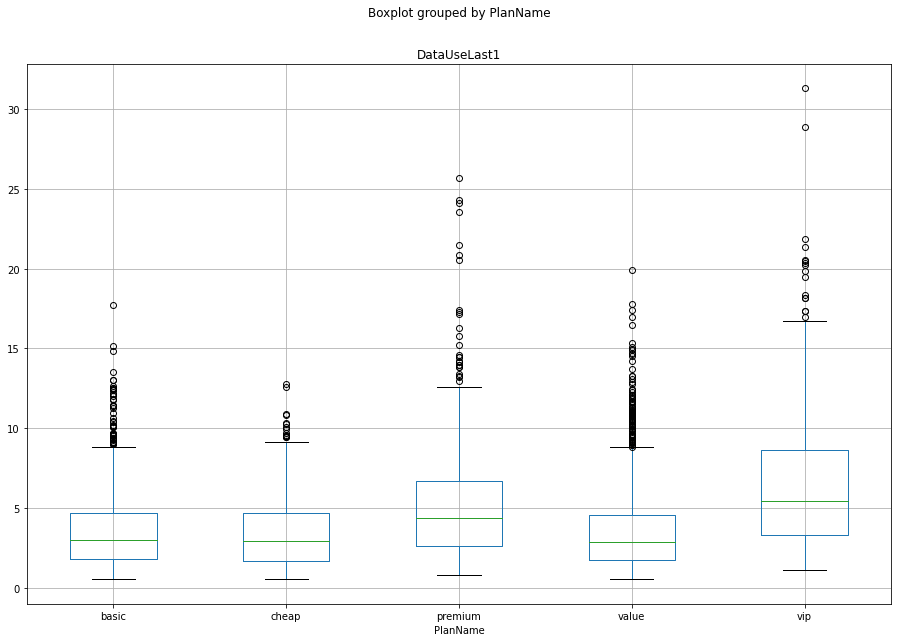

In [ ]:
# We are looking a the distribution of DataUseLast1, grouped by PlanName
telco.boxplot(column="DataUseLast1",by="PlanName",figsize=(15,10))